# Question 1. (100pts) Load the following files
problem_1_data.csv
problem_1_label.csv
• This is a one dimension data.
• No need to split the data into training, validation, and test.
• No need to center the data
1) Assuming we are using the function

f(x) = ax2 + bx + c

2) Use Closed-form method to solve for a, b, c.
3) Plot out the scatter plot of the data and your f(x).

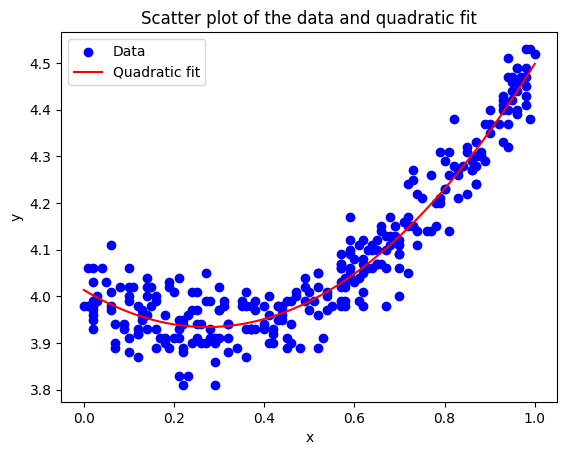

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/Users/shreyas/Desktop/ML/problem_1_data.csv')
labels = pd.read_csv('/Users/shreyas/Desktop/ML/problem_1_label.csv')

# Extract x and y values
x = data.values.flatten()
y = labels.values.flatten()

# Create the design matrix for quadratic function
X = np.vstack([x**2, x, np.ones(len(x))]).T

# Solve for a, b, c using the closed-form solution
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
a, b, c = coefficients

# Define the quadratic function
def f(x):
    return a * x**2 + b * x + c

# Plot the scatter plot of the data
plt.scatter(x, y, color='blue', label='Data')

# Plot the quadratic function
x_vals = np.linspace(min(x), max(x), 100)
plt.plot(x_vals, f(x_vals), color='red', label='Quadratic fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter plot of the data and quadratic fit')
plt.show()

# Question 2. (100pts) Load the following files
problem_2_data.csv
problem_2_label.csv
1) Split the data into train, validation, test.
2) Center and Scale the data.
3) Use gradient descent to train both linear and 2nd-order polynomial models.
• Show the plot of MSE going down as you step through gradient descent.
• Print out the final MSE for both models on training, validation, and test?
• Which model would you pick?

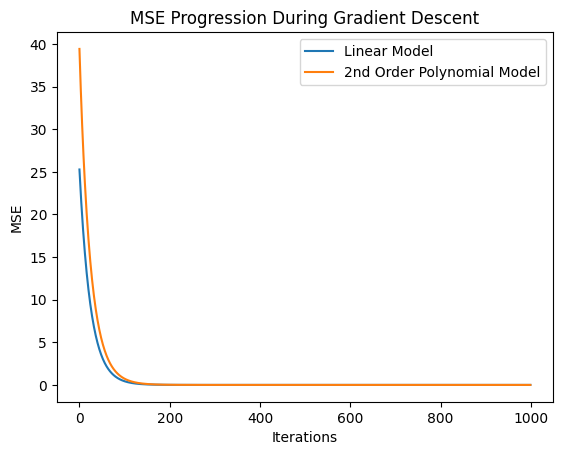

Linear Model MSE:
Training MSE: 0.0026
Validation MSE: 0.0025
Test MSE: 0.0018

Polynomial Model (2nd order) MSE:
Training MSE: 0.0026
Validation MSE: 0.0025
Test MSE: 0.0019

The Polynomial Model is chosen as it performs better on validation set.


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/Users/shreyas/Desktop/ML/problem_2_data.csv')
labels = pd.read_csv('/Users/shreyas/Desktop/ML/problem_2_label.csv')

# Convert to NumPy arrays for easier manipulation
X = data.values
y = labels.values.flatten()  # Flatten in case it's a column vector

# Split the data into train, validation, test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Center and scale the data (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Gradient Descent for Linear and Polynomial Models

# Mean Squared Error function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent Algorithm for linear regression
def gradient_descent_linear(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (intercept)
    theta = np.random.randn(n + 1)  # Random initialization of weights
    mse_values = []

    for i in range(iterations):
        y_pred = X_b.dot(theta)
        gradients = 2/m * X_b.T.dot(y_pred - y)
        theta -= learning_rate * gradients
        mse_values.append(mse(y, y_pred))  # Track MSE

    return theta, mse_values

# Gradient Descent Algorithm for polynomial regression (2nd order)
def gradient_descent_polynomial(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    X_poly = np.c_[np.ones((m, 1)), X, X**2]  # Add bias and squared feature
    theta = np.random.randn(n * 2 + 1)  # Random initialization of weights
    mse_values = []

    for i in range(iterations):
        y_pred = X_poly.dot(theta)
        gradients = 2/m * X_poly.T.dot(y_pred - y)
        theta -= learning_rate * gradients
        mse_values.append(mse(y, y_pred))  # Track MSE

    return theta, mse_values

# Train both models
theta_linear, mse_linear = gradient_descent_linear(X_train_scaled, y_train)
theta_poly, mse_poly = gradient_descent_polynomial(X_train_scaled, y_train)

# Plot MSE values for both models during training
plt.plot(mse_linear, label='Linear Model')
plt.plot(mse_poly, label='2nd Order Polynomial Model')
plt.title('MSE Progression During Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Final MSE for both models on training, validation, and test sets
def compute_mse_on_datasets(theta, X_train, X_val, X_test, y_train, y_val, y_test, poly=False):
    if poly:
        X_train_poly = np.c_[np.ones((X_train.shape[0], 1)), X_train, X_train**2]
        X_val_poly = np.c_[np.ones((X_val.shape[0], 1)), X_val, X_val**2]
        X_test_poly = np.c_[np.ones((X_test.shape[0], 1)), X_test, X_test**2]
    else:
        X_train_poly = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_val_poly = np.c_[np.ones((X_val.shape[0], 1)), X_val]
        X_test_poly = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    
    y_train_pred = X_train_poly.dot(theta)
    y_val_pred = X_val_poly.dot(theta)
    y_test_pred = X_test_poly.dot(theta)
    
    return mse(y_train, y_train_pred), mse(y_val, y_val_pred), mse(y_test, y_test_pred)

# Compute MSE on all sets for both models
mse_train_linear, mse_val_linear, mse_test_linear = compute_mse_on_datasets(
    theta_linear, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, poly=False)

mse_train_poly, mse_val_poly, mse_test_poly = compute_mse_on_datasets(
    theta_poly, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, poly=True)

# Print final MSE for both models
print("Linear Model MSE:")
print(f"Training MSE: {mse_train_linear:.4f}")
print(f"Validation MSE: {mse_val_linear:.4f}")
print(f"Test MSE: {mse_test_linear:.4f}")

print("\nPolynomial Model (2nd order) MSE:")
print(f"Training MSE: {mse_train_poly:.4f}")
print(f"Validation MSE: {mse_val_poly:.4f}")
print(f"Test MSE: {mse_test_poly:.4f}")

# Final decision on which model to pick
if mse_val_poly < mse_val_linear:
    print("\nThe Polynomial Model is chosen as it performs better on validation set.")
else:
    print("\nThe Linear Model is chosen as it performs better on validation set.")


# Question 3. (150pts) Load the following files
lunch_wait_time.csv.
This file consists of 200 people recording the amount of time they waited in line until they got to order their lunch.
Use the 200 samples as {x1, x2, ..., x200} in the minimization problem

min
θ
−n ln θ + θ
∑n
i
xi

1) Solve for the closed-form solution for θ.
(Note: that the closed-form solution is when you take the derivative and set it to 0 to solve for θ)
2) Run Gradient Descent to minimize this objective and find θ.
The 2 θ
′
s should match.

3) Find the population mean, variance, and standard deviation for this dataset.


In [17]:
import numpy as np
import pandas as pd

# Load the data
wait_times = pd.read_csv('/Users/shreyas/Desktop/ML/lunch_wait_time.csv')

# Extract the wait times as a numpy array
x = wait_times.values.flatten()

# Closed-form solution for θ
theta_closed_form = len(x) / np.sum(x)
print(f"Closed-form solution for θ: {theta_closed_form}")

# Gradient Descent to minimize the objective and find θ
def gradient_descent_theta(x, learning_rate=0.01, iterations=1000):
    n = len(x)
    theta = np.random.rand()  # Random initialization of θ
    for i in range(iterations):
        gradient = -n / theta + np.sum(x)
        theta -= learning_rate * gradient
    return theta

theta_gradient_descent = gradient_descent_theta(x)
print(f"Gradient Descent solution for θ: {theta_gradient_descent}")

# Population mean, variance, and standard deviation
mean = np.mean(x)
variance = np.var(x)
std_deviation = np.std(x)

print(f"Population mean: {mean}")
print(f"Population variance: {variance}")
print(f"Population standard deviation: {std_deviation}")

Closed-form solution for θ: 0.9573751563552391
Gradient Descent solution for θ: 0.7475047121696442
Population mean: 1.0445226130653267
Population variance: 1.0302609530062372
Population standard deviation: 1.0150177106859946


# Question 4. (150pts) Given

A = np.array([[1, 1, 1],
              [4, 2, 1],
              [9, 3, 1],
              [16, 4, 1]])

y = np.array([2, 4, 8, 14])


Solve the minimization problem

min
w
(Aw − y)
2
.

1) Using Gradient descent.
2) Using the closed-form solution.
The 2 solutions should match

In [21]:
import numpy as np

# Define the matrix A and vector y
A = np.array([[1, 1, 1],
              [4, 2, 1],
              [9, 3, 1],
              [16, 4, 1]])

y = np.array([2, 4, 8, 14])

# Gradient Descent Algorithm
def gradient_descent(A, y, learning_rate=0.01, iterations=50000):  # Increased iterations
    m, n = A.shape
    w = np.random.randn(n)  # Random initialization of weights
    for i in range(iterations):
        gradient = 2/m * A.T.dot(A.dot(w) - y)
        w -= learning_rate * gradient
    return w

# Closed-form solution using the normal equation
def closed_form_solution(A, y):
    return np.linalg.inv(A.T @ A) @ A.T @ y

# Solve using gradient descent
w_gradient_descent = gradient_descent(A, y)
print(f"Gradient Descent solution for w: {w_gradient_descent}")

# Solve using closed-form solution
w_closed_form = closed_form_solution(A, y)
print(f"Closed-form solution for w: {w_closed_form}")

# Verify that both solutions match
assert np.allclose(w_gradient_descent, w_closed_form), "The solutions do not match!"

Gradient Descent solution for w: [ 1.         -0.99999998  1.99999998]
Closed-form solution for w: [ 1. -1.  2.]
